# Conhecendo o Dataset

## Entendendo os dados do meu Spotify
<hr>

### Descrição:
<p <p style='font-size: 18px; line-height: 2; margin: 5px 5px; text-align: justify; text-indent:10px;'> Os dados que serão analisados foram tirados do meu spotify, dados esses de tudo que foi reproduzido no periodo de um ano, entre 06/2020 a 06/2021
</p>

### Dados:
* Cada linha da base de dados corresponde a uma musica ou um podcast tocado, cada coluna contém um atributo, sendo eles:

     1. **"endTime"** Data e hora de quando o stream terminou no formato UTC (fuso horário universal coordenado).
     2. **"artistName"** Nome do "criador" de cada fluxo (por exemplo, o nome do artista, se for uma faixa de música ou nome do podcast).
     3. **"trackName"** Nome dos itens ouvidos ou assistidos (por exemplo, título da faixa musical ou nome do vídeo). 
     4. **"msPlayed"** Significa quantos milissegundos a faixa foi ouvida. 


# Importando bibliotecas

In [1]:
# Importando as bibliotecas:
import pandas as pd
import json
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

# definindo temas da plotagem dos gráficos
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# Importando dados

* Ao usar a função automática para baixar os dados do Spotify, recebi vários arquivos no formato JSON, dentre eles, 4 arquivos chamados 'Streaming History', que são os dados de audio e podcasts,  schei melhor juntá-los em um unico arquivo no formato csv.

In [2]:
spotify = pd.read_csv('data/spotify_Streaming_History.csv')

# Entendendo os dados

In [3]:
# visualizando 5 dados aleatórios
spotify.sample(5)

,endTime,artistName,trackName,msPlayed
9967,2020-10-28 10:40,Autoperformance,Pablo Spyer - A hora do Touro,133987
21413,2021-03-18 18:15,Melody,No Batidão,84565
26034,2021-05-12 14:28,Bobby Darin,Dream Lover,661
518,2020-06-30 23:00,The Rolling Stones,You Can't Always Get What You Want,0
1657,2020-07-15 23:01,AC/DC,Moneytalks,1935


In [4]:
# visualizando informações gerais dos dados
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31245 entries, 0 to 31244
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     31245 non-null  object
 1   artistName  31245 non-null  object
 2   trackName   31245 non-null  object
 3   msPlayed    31245 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 976.5+ KB


## Verificando tamanho da base de dados e se há dados nulos

In [5]:
print('{} Linhas e {} colunas'.format(spotify.shape[0], spotify.shape[1]))
print('Quantidade de dados nulos:', spotify.isna().sum().sum())

31245 Linhas e 4 colunas
Quantidade de dados nulos: 0


* Como verificado acima a base de dados não contém dados nulos, diante disso iremos seguir normalmente com as analises.

In [6]:
# Verificando tipos de cada coluna
spotify.dtypes

endTime       object
artistName    object
trackName     object
msPlayed       int64
dtype: object

* Como verificado acima a coluna que contem datas não está no formato datetime, diante disso irei fazer a conversão dessa coluna para tornar melhor as análises futuras.

## Convertendo coluna 'endTime' para $datetime$

In [7]:
spotify['endTime'] = pd.to_datetime(spotify['endTime'])

In [8]:
spotify.dtypes

endTime       datetime64[ns]
artistName            object
trackName             object
msPlayed               int64
dtype: object

# Análises

## Verificando quanto tempo de audio foi escutado nesse periodo

Lembrando que os dados dessa váriavel estão sendo contados em **milissegundos**
* Para facilitar o entendimento irei criar uma nova coluna onde irá conter os dados em **horas**.
<hr>

In [9]:
# criando uma nova coluna e atribuindo dados em 'HORAS' a partir da coluna 'msPlayed'
spotify['hours'] = spotify['msPlayed'].map(lambda x: x / 3.6e+6)

In [10]:
# verificando quantas horas de audio foram tocadas
inicio = spotify.endTime.min().strftime('%d/%m/%Y')
fim = spotify.endTime.max().strftime('%d/%m/%Y')

print(
    'Foi escutado um total do de {} horas de Musicas/Podcats, dando um total de {} dias,\nescutados entre os dias {} e {}'
    .format(int(spotify['hours'].sum()),
            int(spotify['hours'].sum()) // 24, inicio, fim))

Foi escutado um total do de 1015 horas de Musicas/Podcats, dando um total de 42 dias,
escutados entre os dias 23/06/2020 e 24/06/2021


### Verificando a média diária de horas escutadas.

In [11]:
# agrupando dados por data e horas escutadas
horas_escutadas_por_dia = spotify.groupby('endTime')[['hours']].sum()
# agrupando dados por dias e verificando a média de horas escutadas
media_horas_escutadas_por_dia = horas_escutadas_por_dia.resample('d').sum().round().mean()
# agrupando dados por dias e verificando o máximo de horas escutadas
maximo_horas_escutadas_dia = horas_escutadas_por_dia.resample('d').sum().round().max()
print(
    ' A média diária de horas escutadas foram de {} e o máximo de horas escutadas em um dia foi de {}'
    .format(media_horas_escutadas_por_dia.values[0].round(2),
            maximo_horas_escutadas_dia.values[0]))

 A média diária de horas escutadas foram de 2.75 e o máximo de horas escutadas em um dia foi de 8.0


## Verificando se as horas escutadas aumentaram ou diminuiram durante o tempo


In [12]:
spotify.endTime

0       2020-06-23 02:13:00
1       2020-06-23 12:34:00
2       2020-06-24 11:37:00
3       2020-06-24 11:41:00
4       2020-06-24 11:41:00
                ...        
31240   2021-06-24 13:01:00
31241   2021-06-24 13:30:00
31242   2021-06-24 19:23:00
31243   2021-06-24 22:44:00
31244   2021-06-24 23:31:00
Name: endTime, Length: 31245, dtype: datetime64[ns]

* **Agrupando os dados com as horas escutadas por mes.**

In [13]:
# Agrupando os dados por horas tocas, em seguida agrupando por mês usando o método .resample
horas_escutadas_por_mes = spotify.groupby('endTime')[[
    'hours'
]].sum().resample('m').sum().round()

# visualizando
horas_escutadas_por_mes

,hours
endTime,
2020-06-30,9.0
2020-07-31,67.0
2020-08-31,49.0
2020-09-30,76.0
2020-10-31,85.0
2020-11-30,87.0
2020-12-31,99.0
2021-01-31,100.0
2021-02-28,64.0


### Visulizando Gráfico do comportamento de horas escutadas.

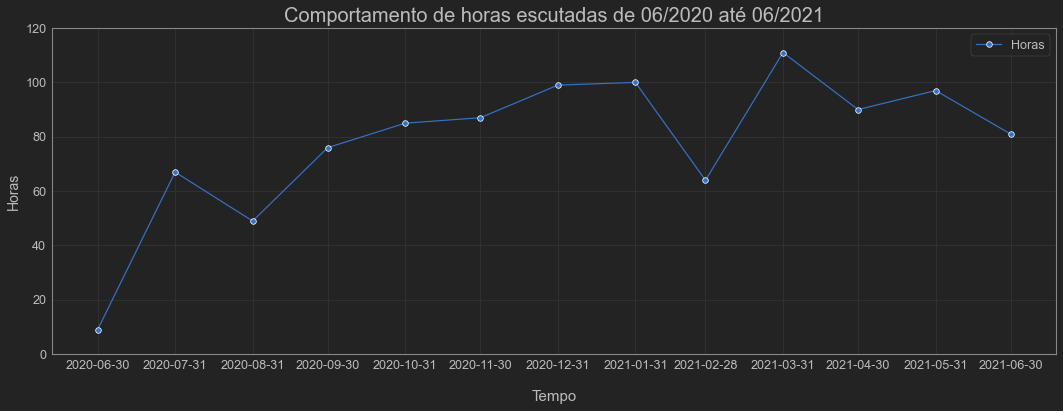

In [14]:
# setando tamanho do gráfico
ax = plt.subplots(figsize=(18, 6))
# atribuindo dados ao gráfico
ax = sns.lineplot(x='endTime',
                  y='hours',
                  data=horas_escutadas_por_mes,
                  marker='o')
# atribuindo titulo
ax.set_title('Comportamento de horas escutadas de {} até {}'.format(
    inicio[3:], fim[3:]),
             fontsize=20)
# setando legenda
ax.legend(['Horas'], loc='upper right')
# titulo label x
ax.set_xlabel('Tempo', fontsize=15, labelpad=18)
# titulo label y
ax.set_ylabel('Horas', fontsize=14)
# setando escala da eixo x
plt.xticks(horas_escutadas_por_mes.index)
# setando escala da eixo y
plt.yticks([0, 20, 60, 40, 80, 100, 120])

ax = ax

# salvando imagem do gráfico
plt.savefig('imagens/horas escutadas.png', bbox_inches='tight')


## Verificando horas tocas por Ano

* Criando uma nova coluna contendo os anos

In [15]:
# criando coluna nov contendo os anos
spotify['year'] = spotify['endTime'].dt.year
# visualizando dados
spotify.head()

,endTime,artistName,trackName,msPlayed,hours,year
0,2020-06-23 02:13:00,Skrillex,First of the Year (Equinox),142280,0.039522,2020
1,2020-06-23 12:34:00,DESOBEDIÊNCIA PRODUTIVA COM IVAN MORÉ,O QUE SÃO ASSISTENTES DE VOZ? COM CONRADO CAON,1137038,0.315844,2020
2,2020-06-24 11:37:00,Black Sabbath,Sabbath Bloody Sabbath,347626,0.096563,2020
3,2020-06-24 11:41:00,Ozzy Osbourne,All My Life,258277,0.071744,2020
4,2020-06-24 11:41:00,The Rolling Stones,"Paint It, Black",22127,0.006146,2020


In [16]:
spotify['year'].unique()

array([2020, 2021], dtype=int64)

* Criando um df apenas com os anos e as horas tocadas

In [17]:
horas_tocas_por_Ano = spotify.groupby(['year'])[[
    'hours'
]].sum().round(0).reset_index().sort_values(by=['hours'], ascending=False)

horas_tocas_por_Ano

,year,hours
1,2021,543.0
0,2020,472.0


### Gráficos das horas escutadas por ano


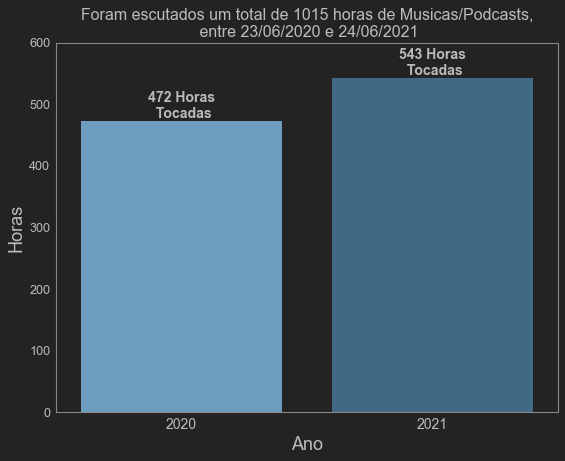

In [18]:
# Definindo variáveis
anos = horas_tocas_por_Ano.year
horas = horas_tocas_por_Ano.hours
# setando tamanho do gráfico
ax = plt.subplots(figsize=(9, 6.8))
# atribuindo dados ao gráfico
ax = sns.barplot(x=anos, y=horas, palette="Blues_d")
# setando titulo
ax = plt.title(
    'Foram escutados um total de {} horas de Musicas/Podcasts,\n entre {} e {}'
    .format(int(spotify['hours'].sum().round()), inicio, fim),
    fontsize=16)
# setando titulo do eixo x
ax = plt.xlabel('Ano', fontsize=18)
# setando titulo do eixo y
ax = plt.ylabel("Horas", fontsize=18)
# setando tamanho da fonte do eixo x
ax = plt.xticks(size=14)
# setando escala da eixo y
ax = plt.yticks([0, 100, 200, 300, 400, 500, 600])
ax = plt.grid(False)
# definindo variáveis de anotações do gráfico
n = range(horas_tocas_por_Ano.shape[0])
s = horas_tocas_por_Ano.hours
# criando função para a visualização dos valores na barra
for i in range(len(s)):
    plt.annotate("{} Horas\n Tocadas".format(int(s[i])),
                 xy=(n[i], s[i] * 1.0),
                 fontsize=14,
                 ha='center',
                 va='bottom',
                 fontweight='bold')
#'top', 'bottom', 'center', 'baseline', 'center_baseline'
ax = ax
# salvando imagem do gráfico
plt.savefig('imagens/horas escutadas por anos.png', bbox_inches='tight')

In [19]:
n

range(0, 2)

## Verificando quais foram as bandas mais escutadas.

* Para essa análise irei utilizar uma outra base de dados que que contém os dados com os nomes dos artistas e podcasts que escuto.

In [20]:
# Atribuindo arquivo a uma variável provisória pra leitura
file = 'data/YourLibrary.json'
# Carregando arquivo
with open(file, encoding='utf-8') as data:
    data = json.load(data)

# criando uma lista apenas com o nome de cada artista usando o método json_normalize
artists = pd.json_normalize(data, 'artists')['name'].tolist()

In [21]:
# visualizando lista de artistas
print(artists)

['AC/DC', 'Aerosmith', 'Black Sabbath', 'Arctic Monkeys', 'The Doors', 'R.E.M.', 'Engenheiros Do Hawaii', 'Eric Clapton', 'Huey Lewis & The News', 'David Bowie', 'Lynyrd Skynyrd', 'Led Zeppelin', 'Creedence Clearwater Revival', 'Queen', 'Skank', 'The Beatles', 'The Rolling Stones', 'The Who', 'Scorpions', 'Red Hot Chili Peppers', 'Pink Floyd', 'Dire Straits', 'Charlie Brown Jr.', 'CPM 22', 'O Rappa']


In [22]:
top_10_bandas = spotify.query(f'artistName == {artists}')[[
    'artistName', 'hours'
]]

top_10_bandas = top_10_bandas.groupby(['artistName']).sum().round(0).sort_values(
    by='hours', ascending=False).head(10).reset_index()

top_10_bandas

,artistName,hours
0,Led Zeppelin,52.0
1,AC/DC,50.0
2,The Beatles,27.0
3,The Rolling Stones,24.0
4,Black Sabbath,22.0
5,Dire Straits,20.0
6,The Who,13.0
7,Queen,13.0
8,Aerosmith,13.0
9,Eric Clapton,12.0


### Gráficos das Bandas Mais Tocadas

#### Seaborn

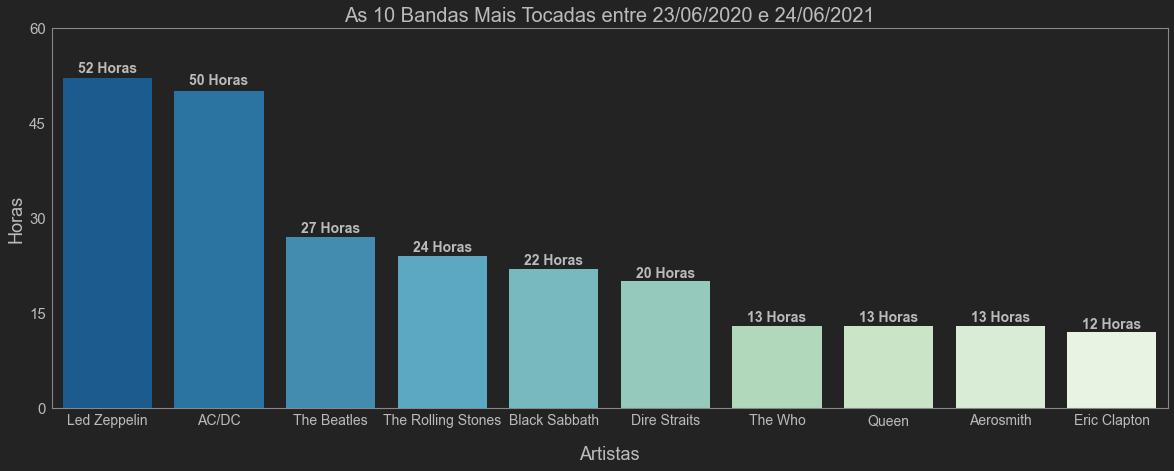

In [23]:
# Definindo variáveis
artista = top_10_bandas.artistName
horas = top_10_bandas.hours

# setando tamanho do gráfico
ax = plt.subplots(figsize=(20, 7))
# atribuindo dados ao gráfico
ax = sns.barplot(
    x=artista,
    y=horas,
    palette="GnBu_r",
)
# setando titulo
ax = plt.title('As 10 Bandas Mais Tocadas entre {} e {}'.format(inicio, fim), fontsize=20)
# setando titulo do eixo x
ax = plt.xlabel('Artistas', fontsize=18, labelpad=18)
# setando titulo do eixo y
ax = plt.ylabel("Horas", fontsize=18)
# setando tamanho da fonte do eixo x
ax = plt.xticks(size=14)
# setando escala da eixo y
ax = plt.yticks(range(0,75, 15), size=15)
# removendo grade do gráfico
ax = plt.grid(False)
# definindo variáveis de anotações do gráfico
n = range(top_10_bandas.shape[0])
s = top_10_bandas.hours.values
# criando função para a visualização dos valores na barra
for i in range(len(s)):
    plt.annotate("{} Horas".format(int(s[i])),
                 xy=(n[i], s[i] * 1.01),
                 fontsize=14,
                 ha='center',
                 fontweight='bold',
                 va='bottom')
    
ax = ax    

# salvando imagem do gráfico     
plt.savefig('imagens/as bandas mais tocadas.png', bbox_inches='tight')

## Verificando quais foram as musicas mais tocadas

In [24]:
# criando um query a partir dos artirtas 
artist = spotify.query(f'artistName == {artists}')[[
    'artistName', 'hours', 'trackName'
]]

# agruprando os dados pelas musicas e suas hors tocadas
as_mais_tocadas = artist.groupby(['trackName', 'artistName'])[[
    'hours'
]].sum().round(0).sort_values(by='hours', ascending=False).reset_index().head(10)

# visualizando dados
as_mais_tocadas

,trackName,artistName,hours
0,Stairway to Heaven - Remaster,Led Zeppelin,6.0
1,"Hey, Hey, What Can I Do - Remaster",Led Zeppelin,5.0
2,When the Levee Breaks - Remaster,Led Zeppelin,5.0
3,Since I've Been Loving You - Remaster,Led Zeppelin,4.0
4,Won't Get Fooled Again - Original Album Version,The Who,4.0
5,"Sultans Of Swing - Live At Hammersmith Odeon, ...",Dire Straits,4.0
6,Babe I'm Gonna Leave You - Remaster,Led Zeppelin,4.0
7,Heaven and Hell - 2009 Remaster,Black Sabbath,4.0
8,Shoot to Thrill,AC/DC,4.0
9,Stairway to Heaven - (Live at MSG 1973) [Remas...,Led Zeppelin,4.0


### Gráficos das musicas mais tocadas

* Quebrando o texto para adicionar ao labels do gráfico

In [25]:
# filtrando apenas os nomes das musicas
labels = as_mais_tocadas.trackName.values.tolist()
# Criando uma função para quebrar o texto
labels= ['\n'. join(wrap(l,20)) for l in labels ]

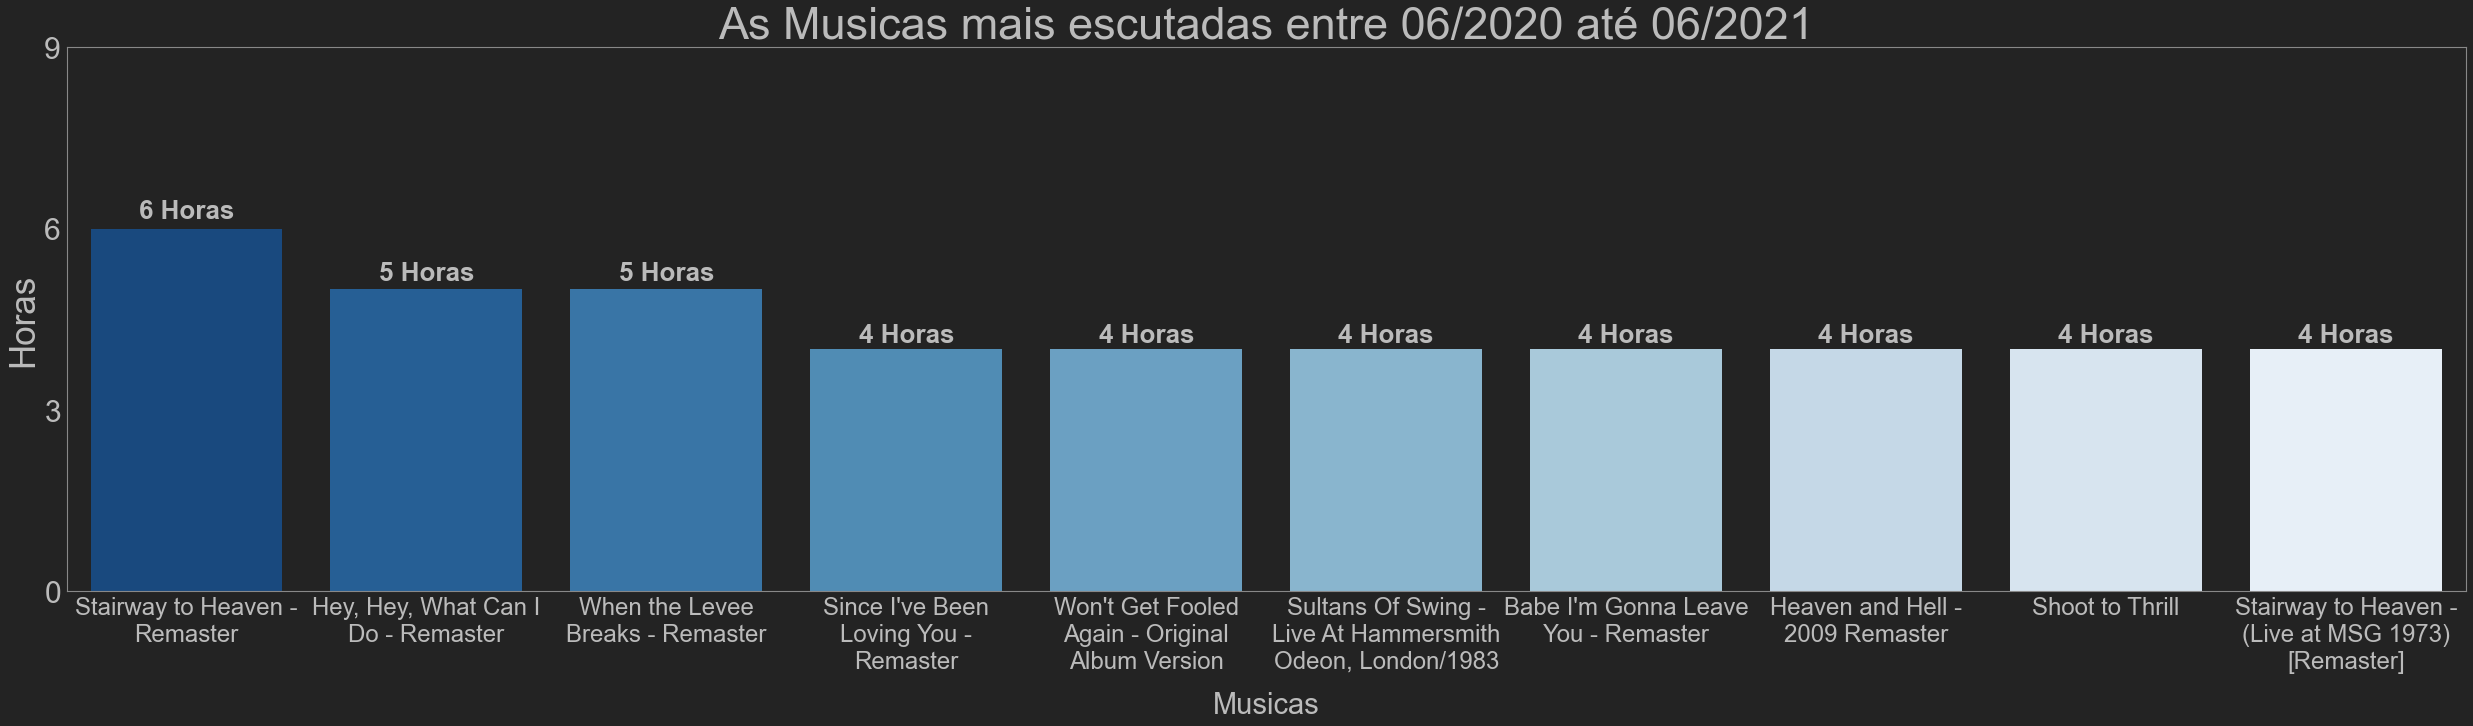

In [26]:
# Definindo variáveis
musicas = as_mais_tocadas.trackName
horas = as_mais_tocadas.hours

# setando tamanho do gráfico
ax = plt.subplots(figsize=(43, 10))
# atribuindo dados ao gráfico
ax = sns.barplot(
    x=musicas,
    y=horas,
    palette="Blues_r"
)
# setando titulo
ax = plt.title('As Musicas mais escutadas entre {} até {}'.format(inicio[3:], fim[3:]),fontsize=45)
# setando titulo do eixo x
ax = plt.xlabel('Musicas', fontsize=29, labelpad=18)
# setando titulo do eixo y
ax = plt.ylabel("Horas", fontsize=35)
# setando tamanho da fonte do eixo x
ax = plt.xticks(range(len(labels)), labels, size=24, rotation=0)
# setando escala da eixo y
ax = plt.yticks(range(0,10, 3), size=30)
# definindo variáveis de anotações do gráfico
ax = plt.grid(False)
n = range(as_mais_tocadas.shape[0])
s = as_mais_tocadas.hours.values.round()
# criando função para a visualização dos valores na barra
for i in range(len(s)):
    plt.annotate("{} Horas".format(int(s[i])),
                 xy=(n[i], s[i] * 1.03),
                 fontsize=26,
                 fontweight='bold',
                 ha='center',
                 va='baseline')
    
ax = ax

# salvando imagem do gráfico  
plt.savefig('imagens/as musicas mais escutadas.png', bbox_inches='tight')

## Verificando quais foram os Podcasts mais escutados

* Assim como fiz para a criação de uma lista com os nomes dos artistas que escuto, irei fazer o mesmo com os Podcasts, criando uma lista apenas com os nomes a partir de uma novos arquivo.

In [27]:
# criando uma lista apenas com o nome de cada podcasts usando o método json_nomalize
podcasts = list(pd.json_normalize(data, 'shows')['name'])

In [28]:
# visualizando lista de artistas
print(podcasts)

['Data Hackers', 'Do Zero ao Topo', 'Hipsters Ponto Tech', 'Inteligência Ltda.', "Let's Data Podcast", 'Mauricio Meirelles Podcast', 'Muito Risco Pouco Ego', 'NerdCast', 'Não Ouvo Podcasts', 'Os Sócios Podcast', 'Podpah', 'Primocast', 'Pro Football | NFL', 'Sinapse', 'Stack | Datacast', 'Stock Pickers', 'Ticaracaticast', 'Flow Podcast']


In [29]:
# criando uma query apenas com os Podcasts
query = spotify.query(f'artistName == {podcasts}')[['artistName', 'hours']]

# agrupando dados
podcasts_mais_tocados = query.groupby([
    'artistName'
]).sum().round(0).sort_values(by='hours',
                              ascending=False).head(10).reset_index()
# renomeando coluna
podcasts_mais_tocados.rename(columns={"artistName": "podcasts"}, inplace=True)
# alterando tipo da coluna
podcasts_mais_tocados.hours = podcasts_mais_tocados.hours.astype('int')
# visualizando dados
podcasts_mais_tocados

,podcasts,hours
0,Inteligência Ltda.,155
1,Flow Podcast,72
2,NerdCast,62
3,Primocast,26
4,Pro Football | NFL,25
5,Stock Pickers,23
6,Hipsters Ponto Tech,19
7,Data Hackers,15
8,Não Ouvo Podcasts,14
9,Mauricio Meirelles Podcast,14


In [30]:
from textwrap import wrap
# filtrando apenas os nomes das musicas
labels1 = podcasts_mais_tocados.podcasts.values.tolist()
# Criando uma função para quebrar o texto
labels1= ['\n'. join(wrap(l,12)) for l in labels1 ]

### Gráfico dos Podcasts mais tocados entre 06/2020 e 06/2021

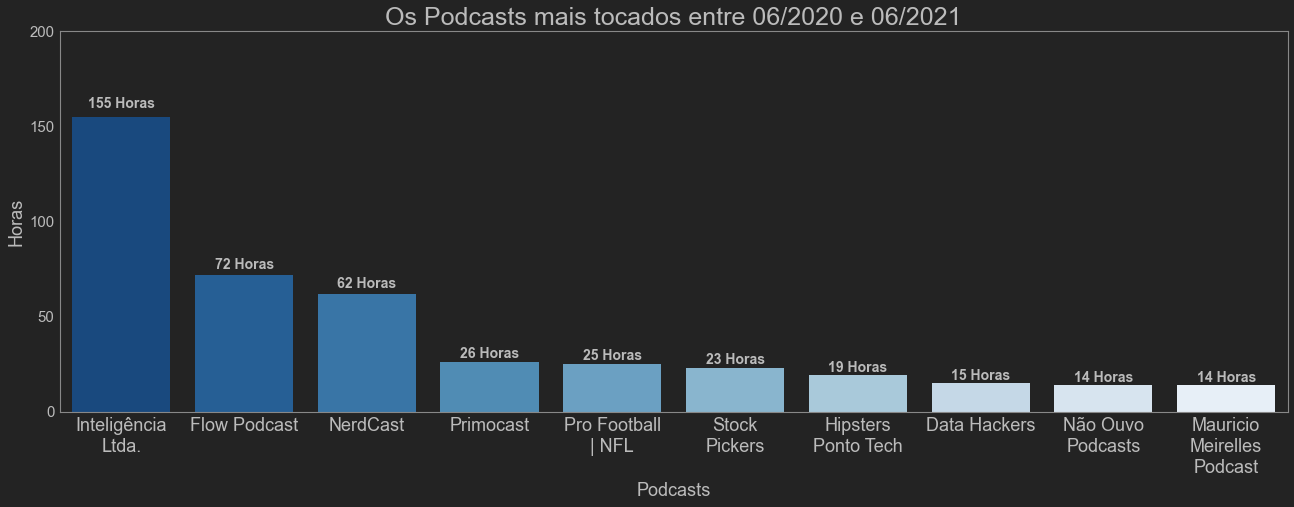

In [32]:
# transformando em um df
dados = pd.DataFrame(podcasts_mais_tocados)
# sentado tamnho do gráfico
ax = plt.subplots(figsize=(22, 7))
# atribuindo dados ao gráfico
ax = sns.barplot(x='podcasts', y='hours', data=podcasts_mais_tocados, palette="Blues_r")
# setando titulo
ax = plt.title('Os Podcasts mais tocados entre {} e {}'.format(inicio[3:],fim[3:]), fontsize=25)
# setando titulo do eixo x
ax = plt.xlabel('Podcasts', fontsize=18, labelpad=5)
# setando titulo do eixo y
ax = plt.ylabel("Horas", fontsize=18)
# setando tamanho da fonte do eixo x
ax = plt.xticks(range(len(labels1)), labels1, size=18, rotation=0)
# setando escala do eixo y
ax = plt.yticks(range(0,250, 50), size=15)
# definindo variáveis de anotações do gráfico
ax = plt.grid(False)
# definindo variáveis de anotações do gráfico
n = range(podcasts_mais_tocados.shape[0])
s = podcasts_mais_tocados.hours
# criando função para a visualização dos valores na barra
for i in range(len(s)):
    plt.annotate("{} Horas".format(int(s[i])),
                 xy=(n[i], s[i] * 1.02),
                 fontsize=14,
                 fontweight='bold',
                 ha='center',
                 va='bottom')

ax = ax 
  
# salvando imagem do gráfico
plt.savefig('imagens/Podcasts mais tocados entre 06-2020 e 06-2021.png', bbox_inches='tight')

## Podcasts mais tocados nos últimos 6 meses.

In [33]:
# criando uma query apenas com os Podcasts
query1 = spotify.query(f'artistName == {podcasts} & year == 2021')[['artistName', 'hours']]

# agrupando dados
podcasts_mais_tocados_2021 = query1.groupby([
    'artistName'
]).sum().round(0).sort_values(by='hours',
                              ascending=False).head(10).reset_index()
# renomeando coluna
podcasts_mais_tocados_2021.rename(columns={"artistName": "podcasts"}, inplace=True)
# alterando tipo da coluna
podcasts_mais_tocados_2021.hours = podcasts_mais_tocados_2021.hours.astype('int')
# visualizando dados
podcasts_mais_tocados_2021

,podcasts,hours
0,Inteligência Ltda.,153
1,Flow Podcast,43
2,NerdCast,24
3,Hipsters Ponto Tech,11
4,Mauricio Meirelles Podcast,11
5,Os Sócios Podcast,9
6,Primocast,7
7,Sinapse,7
8,Podpah,5
9,Pro Football | NFL,5


* **Com a análise acima podemos ver que a diferença do primeiro podcast mais ecutado para o restando é muito grande, diante disso irei fazer uma comparação entre o primeiro mais escutado e todos os outros podcasts.**

In [34]:
# somando totado de horas escutadas
total_por_podcast = podcasts_mais_tocados_2021['hours'].sum()
# filtrando as horas do podcast mais tocado
total_Inteligência_Ltda = podcasts_mais_tocados_2021.query("podcasts == 'Inteligência Ltda.'").values[0][1]
# somando valor dos podcasts restantes
total_por_resto = total_por_podcast - total_Inteligência_Ltda 
# visualizando 
print('{} Horas escutadas de Inteligência_Ltda e {} dos outros Podcasts '.format(total_Inteligência_Ltda, total_por_resto))

153 Horas escutadas de Inteligência_Ltda e 122 dos outros Podcasts 


### Gráfico dos Podcasts mais tocados nos últimos 6 meses

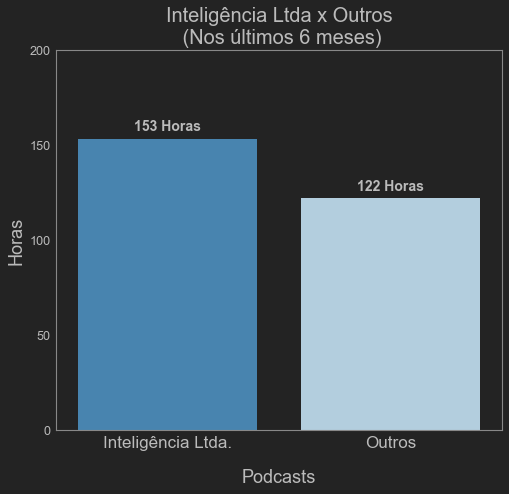

In [35]:
# criando um dicionário
dados = {
    'podcasts': ["Inteligência Ltda.", "Outros"],
    'hours': [total_Inteligência_Ltda, total_por_resto]
}

# transformando em um df
dados = pd.DataFrame(dados)
# sentado tamnho do gráfico
ax = plt.subplots(figsize=(8, 7))
# atribuindo dados ao gráfico
ax = sns.barplot(x='podcasts', y='hours', data=dados, palette="Blues_r")
# setando titulo
ax = plt.title('Inteligência Ltda x Outros\n (Nos últimos 6 meses)', fontsize=20)
# setando titulo do eixo x
ax = plt.xlabel('Podcasts', fontsize=18, labelpad=18)
# setando titulo do eixo y
ax = plt.ylabel("Horas", fontsize=18)
# setando parametros do eixo x
ax = plt.xticks(size=17, rotation=0)
# setando escala do eixo y
ax = plt.yticks(range(0,250, 50))
# definindo variáveis de anotações do gráfico
ax = plt.grid(False)
# definindo variáveis de anotações do gráfico
n = range(dados.shape[0])
s = dados.hours
# criando função para a visualização dos valores na barra
for i in range(len(s)):
    plt.annotate("{} Horas".format(int(s[i])),
                 xy=(n[i], s[i] * 1.02),
                 fontsize=14,
                 fontweight='bold',
                 ha='center',
                 va='bottom')

ax = ax

# salvando imagem do gráfico
plt.savefig('imagens/Podcasts mais tocados nos últimos 6 meses.png', bbox_inches='tight')